# The Basic of Image Preprocessing

### 本章節內容大綱
* [影像縮放 Resize](#影像縮放-Resize)
* [影像平移 Shift](#影像平移)
* [影像旋轉 Rotation](#影像旋轉)
* [影像翻轉 Flip](#影像翻轉)
* [影像仿射 Affine](#影像仿射)

In [1]:
# opencv 在 python 中的 module 為 cv2
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# upload Data
!wget -q https://github.com/TA-aiacademy/course_3.0/releases/download/CVCNN_Data/CVCNN_part1.zip
!unzip -q CVCNN_part1

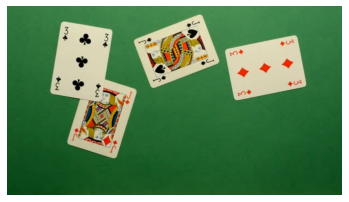

In [3]:
img = cv2.imread("poker.jpg")[:, :, ::-1]

plt.imshow(img)
plt.axis("off")
plt.show()

* ### 影像縮放 Resize

In [4]:
print(img.shape)

(342, 608, 3)


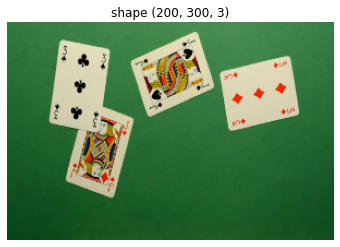

In [5]:
# 縮成 200 x 300  大小
resize_img1 = cv2.resize(img, (300, 200))

plt.imshow(resize_img1)
plt.title("shape {}".format(resize_img1.shape))
plt.axis("off")
plt.show()

-- 如果不想指定縮放大小，可以指定 fx, fy 縮放比例<br>
-- 常見影像補插值法，如下列表<br>

Name             | 插值法
:-----------------:|:--------------------:
cv2.INTER_LINEAR   | 線性插值 (default)       
cv2.INTER_NEAREST  | 最鄰近插值
cv2.INTER_AREA     | 區域插值
cv2.INTER_CUBIC    | 三次插值法

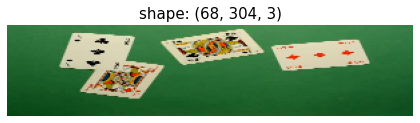

In [6]:
resize_img2 = cv2.resize(img, (0, 0), fx=0.5, fy=0.2)

img_list = [resize_img2]
plt.figure(figsize=(16, 16))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title("shape: {}".format(each.shape), fontsize=15)
    plt.axis("off")
plt.show()

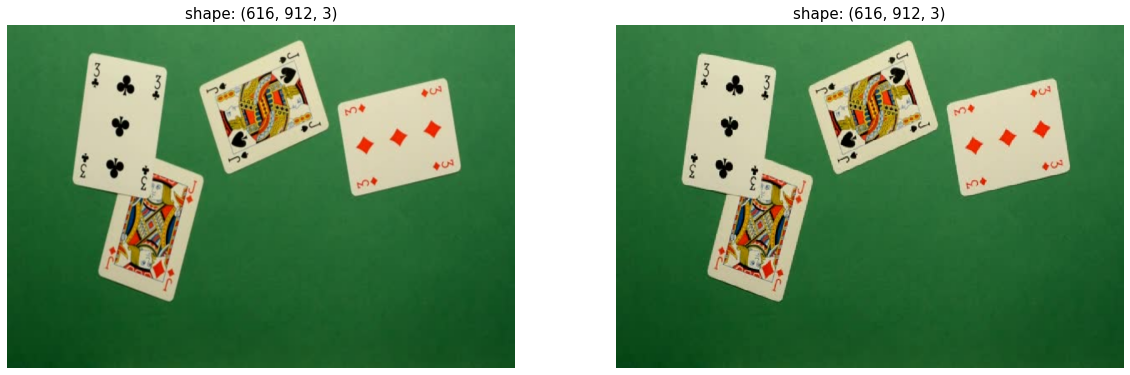

In [7]:
resize_img3 = cv2.resize(img, (0, 0), fx=1.5, fy=1.8)

# 嘗試作比較 cv2.INTER_NEAREST 最鄰近插值
resize_img4 = cv2.resize(img, (0, 0), fx=1.5, fy=1.8,
                         interpolation=cv2.INTER_NEAREST)


img_list = [resize_img3, resize_img4]
plt.figure(figsize=(20, 20))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title("shape: {}".format(each.shape), fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#The-Basic-of-Image-Preprocessing)

* ### 影像平移
 [1] 定義影像平移矩陣 $M$<br>
 [2] 指定水平、垂直位移量 $t_x$ $t_y$<br>
 
 $M = \left[\begin{array}{c c c} 1 & 0 & t_x \\ 0 & 1 & t_y\end{array}\right]$
 
 $M\left[\begin{array}{c} x \\ y\\1\end{array}\right] = \left[\begin{array}{c c c} 1 & 0 & t_x \\ 0 & 1 & t_y\end{array}\right]\left[\begin{array}{c} x \\ y\\1\end{array}\right] = \left[\begin{array}{c} x + t_x \\ y + t_y\end{array}\right]$

In [ ]:
h, w, _ = img.shape
tx, ty = 25, 50
M1 = np.float32([[1, 0, tx],   # 向右 tx
                 [0, 1, ty]])  # 向下 ty
shift_img1 = cv2.warpAffine(img, M1, (w, h))  #


img_list = [img, shift_img1]
plt.figure(figsize=(16, 16))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title("shape: {}".format(each.shape), fontsize=15)

plt.show()

可以注意到上方右圖中，有很多點直接被補成黑色。<br>
有時候我們不希望邊界值被這樣補值。<br>
這時可以透過 warpAffine 中的 borderMode 去改變補值模式。<br>
常見的補值方式如下列表....<br>

Name                  | 插值法
:--------------------:|:-----------------------:
cv2.BORDER_CONSTANT   | 補常數值 (default)       
cv2.BORDER_REPLICATE  | 補最鄰近點值
cv2.BORDER_REFLECT    | 鏡像反射補值
cv2.BORDER_WRAP       | 複製補值

In [ ]:
M2 = np.float32([[1, 0, 100],
                 [0, 1, 50]])
shift_img2 = cv2.warpAffine(img, M2, (w//2, h),
                            borderMode=cv2.BORDER_REFLECT)

shift_img3 = cv2.warpAffine(img, M2, (w//2, h),
                            borderValue=(168, 0, 0))

img_list = [img[:, :img.shape[1]//2], shift_img2, shift_img3]
plt.figure(figsize=(16, 16))
for i, each in enumerate(img_list):
    plt.subplot(1, 3, i+1)
    plt.imshow(each)
    plt.title("shape: {}".format(each.shape), fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#The-Basic-of-Image-Preprocessing)

* ### 影像旋轉
 [1] 複習線性代數旋轉矩陣 $M = \left[\begin{array}{c c} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array}\right]$<br>
 <img src="https://i.imgur.com/U776fTQ.png" width=400  />
 
 $\left[\begin{array}{c}x'\\ y'\end{array}\right] = 
  \left[\begin{array}{c}\cos{(\theta_1 + \theta_2)}\\ \sin{(\theta_1 + \theta_2)}\end{array}\right] = 
  \left[\begin{array}{c}\cos\theta_1\cos\theta_2-    \sin\theta_1\sin\theta_2\\\cos\theta_1\sin\theta_2+\sin\theta_1\cos\theta_2\end{array}\right] = 
  \left[\begin{array}{c}x\cos\theta_2 - y\sin\theta_2\\ x\sin\theta_2 + y\cos\theta_2\end{array}\right] = 
  \left[\begin{array}{c c} \cos\theta_2 & -\sin\theta_2 \\ \sin\theta_2 & \cos\theta_2 \end{array}\right]
  \left[\begin{array}{c}x\\ y\end{array}\right]=
  \left[\begin{array}{c c} \alpha & -\beta \\ \beta & \alpha \end{array}\right]
  \left[\begin{array}{c}x\\ y\end{array}\right]
  $
  
 [2] 回憶起旋轉，我們都是以原點為中心作變換的，在 opencv 中我們另外考慮任一點都能當旋轉中心$(center_x, center_y)$，所以改良後的旋轉矩陣表示如下...
 
 $M = \left[\begin{array}{ccc} \alpha & \beta & (1-\alpha)center_x -\beta center_y \\ -\beta & \alpha & \beta  center_x+(1-\alpha)center_y\end{array}\right]$

In [ ]:
# 第一個參數為旋轉的中心點
# 第二個參數為旋轉角度
# 第三個參數為縮放大小

center = (512//2, 512//2)
M = cv2.getRotationMatrix2D(center, 30, 1)
print(M)

In [ ]:
h, w, _ = img.shape
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, 45, 1)
rotate_img = cv2.warpAffine(img, M, (w, h))

plt.figure(figsize=(8, 8))
plt.imshow(rotate_img)
plt.show()

[(back...)](#The-Basic-of-Image-Preprocessing)

* ### 影像翻轉
cv2.flip 的第一個參數為輸入影像，第二個參數位置為翻轉方向<br>
 *  1: 水平翻轉
 *  0: 垂直翻轉
 * -1: 水平垂直翻轉

In [ ]:
img = cv2.imread('poker.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flipped_A = cv2.flip(img,  1)
flipped_B = cv2.flip(img,  0)
flipped_C = cv2.flip(img, -1)


titles = ['Original Image',
          'Horizantal Flip',
          'Vertical Flip',
          'Horizantal and Vertical Flip']
img_list = [img, flipped_A, flipped_B, flipped_C]
plt.figure(figsize=(20, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(img_list[i])
    plt.title(titles[i], fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#The-Basic-of-Image-Preprocessing)

* ### 影像仿射


影像仿射其實就是平移和旋轉的組合。<br>
前面章節透過 warpAffine 進行過影像平移，而我們可以透過轉換矩陣 $M$ 做到影像仿射。

In [ ]:
h, w, _ = img.shape
raw_loc = np.array([[0, 0], [w, 0], [0, h]]).astype(np.float32)
new_loc = np.array([[0, 0],
                    [w*0.85, h*0.25],
                    [w*0.15, h*0.7]]).astype(np.float32)
affine_transform = cv2.getAffineTransform(raw_loc, new_loc)

In [ ]:
affine_transform

In [ ]:
affine_img1 = cv2.warpAffine(img, affine_transform, (w, h))

In [ ]:
img_list = [img, affine_img1]
titles = ['Original Image', 'Affine transform']
plt.figure(figsize=(20, 20))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title("shape: {}".format(each.shape), fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#The-Basic-of-Image-Preprocessing)